<a href="https://colab.research.google.com/github/guillaumetougas/sbl_hyperspectral_ai/blob/main/02_scripts/sbl_hs_plsda_modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLSDA with 3 main species at SBL

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




ABBA ACRU BEPA 
 861 1864 1992 


ABBA ACRU BEPA 
1722 1864 1992 

[1] 1301

Joining with `by = join_by(BD_Band376nm, BD_Band381nm, BD_Band386nm,
BD_Band391nm, BD_Band396nm, BD_Band400nm, BD_Band405nm, BD_Band410nm,
BD_Band415nm, BD_Band420nm, BD_Band424nm, BD_Band429nm, BD_Band434nm,
BD_Band439nm, BD_Band443nm, BD_Band448nm, BD_Band453nm, BD_Band458nm,
BD_Band463nm, BD_Band467nm, BD_Band472nm, BD_Band477nm, BD_Band482nm,
BD_Band486nm, BD_Band491nm, BD_Band496nm, BD_Band501nm, BD_Band506nm,
BD_Band510nm, BD_Band515nm, BD_Band520nm, BD_Band525nm, BD_Band530nm,
BD_Band534nm, BD_Band539nm, BD_Band544nm, BD_Band549nm, BD_Band553nm,
BD_Band558nm, BD_Band563nm, BD_Band568nm, BD_Band573nm, BD_Band577nm,
BD_Band582nm, BD_Band587nm, BD_Band592nm, BD_Band597nm, BD_Band601nm,
BD_Band606nm, BD_Band611nm, BD_Band616nm, BD_Band620nm, BD_Band625nm,
BD_Band630nm, BD_Band635nm, BD_Band640nm, BD_Band644nm, BD_Band649nm,
BD_Band654nm, BD_Band659nm, BD_Band664nm, BD_Band668nm, BD_Band673nm,
BD_Band678nm, BD_Band683nm, BD_Band687nm, BD_Band692nm, BD_Band697nm,
BD_Band702nm, BD_Band


PLS-DA model (class plsda) summary
------------------------------------
Info: 
Number of selected components: 2
Cross-validation: full (leave one out)

Class #1 (ABBA)
    X cumexpvar Y cumexpvar  TP  FP   TN  FN Spec. Sens. Accuracy
Cal       98.39       11.26 484 273 2417 730 0.899 0.399    0.743
Cv           NA          NA 484 274 2416 730 0.898 0.399    0.743

Class #2 (ACRU)
    X cumexpvar Y cumexpvar  TP  FP   TN   FN Spec. Sens. Accuracy
Cal       98.39       11.26 228 143 2460 1073 0.945 0.175    0.689
Cv           NA          NA 228 144 2459 1073 0.945 0.175    0.688

Class #3 (BEPA)
    X cumexpvar Y cumexpvar  TP  FP   TN   FN Spec. Sens. Accuracy
Cal       98.39       11.26 280 238 2277 1109 0.905 0.202    0.655
Cv           NA          NA 277 239 2276 1112 0.905 0.199    0.654



,ABBA,ACRU,BEPA,None
ABBA,484,60,64,608
ACRU,165,228,174,773
BEPA,108,83,280,937



PLS-DA results (class plsdares) summary:
Number of selected components: 2

Class #1 (ABBA):
        X expvar X cumexpvar Y expvar Y cumexpvar   TP FP TN   FN Spec. Sens.
Comp 1    96.274      96.274   26.040      26.040  605  0  0 1069    NA 0.361
Comp 2     2.351      98.625   -0.643      25.397  650  0  0 1024    NA 0.388
Comp 3     0.892      99.518   -1.173      24.224  651  0  0 1023    NA 0.389
Comp 4     0.182      99.700   19.060      43.285 1118  0  0  556    NA 0.668
Comp 5     0.106      99.806    6.581      49.866 1197  0  0  477    NA 0.715
Comp 6     0.049      99.855   -1.360      48.506 1201  0  0  473    NA 0.717
Comp 7     0.055      99.910    1.708      50.214 1239  0  0  435    NA 0.740
Comp 8     0.022      99.932   -2.475      47.739 1239  0  0  435    NA 0.740
Comp 9     0.013      99.945    4.764      52.504 1270  0  0  404    NA 0.759
Comp 10    0.018      99.963   -0.334      52.169 1276  0  0  398    NA 0.762
Comp 11    0.013      99.976   -1.023      51.146

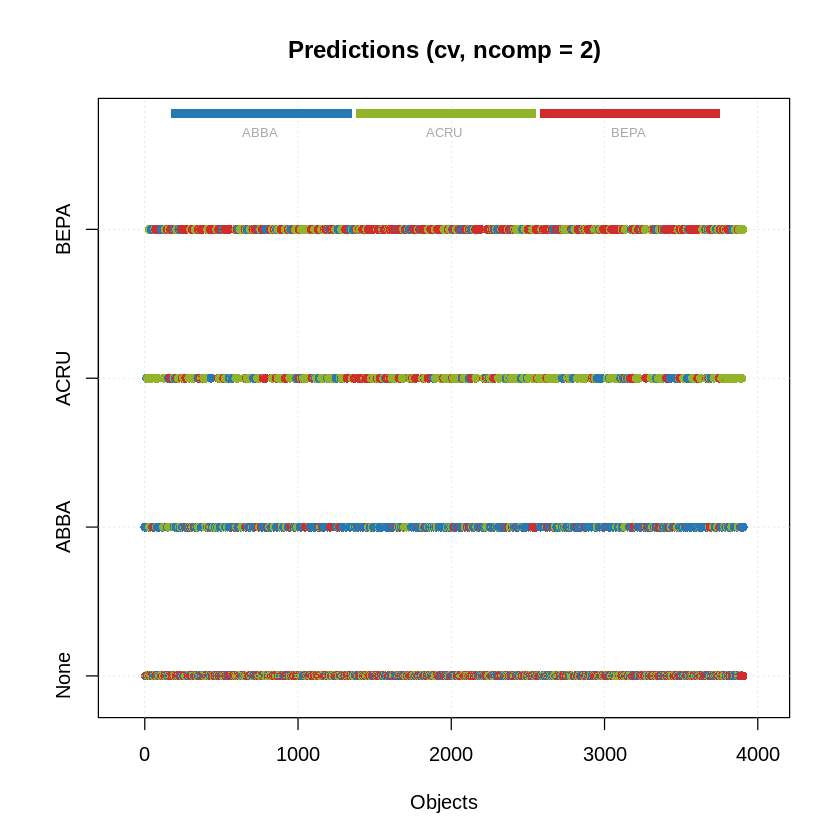

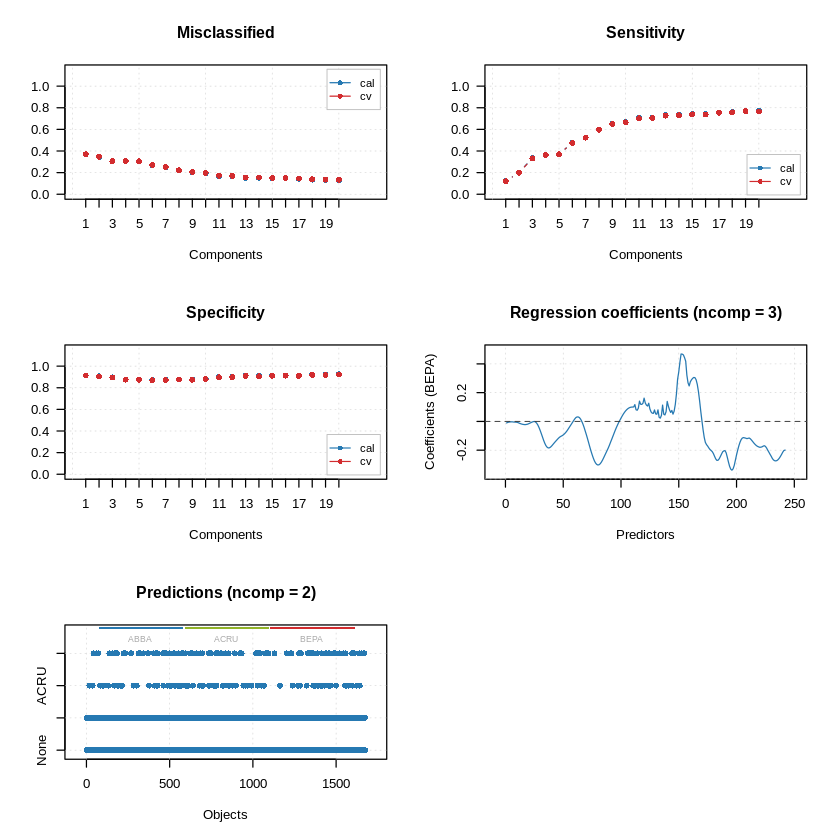

In [16]:
install.packages('mdatools')
install.packages('tidyverse')
install.packages('smotefamily')

library(mdatools)
library(tidyverse)
library(smotefamily)

set.seed(133) #For reproducibility
#import
sbl_sp_ID_bd <- read_rds("sbl_smoothed_spectra.rds")


####SUBSET WITH ABBA,BEPA and ACRU####
sbl_sp_ID_bd_sub <- subset(sbl_sp_ID_bd, Label==c("ABBA","BEPA","ACRU"))

sbl_sp_ID_bd_sub$Label <- as.factor (sbl_sp_ID_bd_sub$Label)
sbl_sp_ID_bd_sub$Label <- droplevels(sbl_sp_ID_bd_sub$Label)#Drop unused factor levels from filtered out species

sbl_sp_ID_bd_sub[, 244] <- factor(sbl_sp_ID_bd_sub[, 244])
table(sbl_sp_ID_bd_sub[, 244])

# Apply SMOTE
smote_sbl_sub_total <- SMOTE(X = sbl_sp_ID_bd_sub[,2:243], target = sbl_sp_ID_bd_sub$Label, K = 5, dup_size = 1)

# Combine the SMOTE result into a new data frame
smote_sbl_sub <- data.frame(smote_sbl_sub_total$data)
names(smote_sbl_sub)[ncol(smote_sbl_sub)] <- "Species"
smote_sbl_sub$Species <- as.factor(smote_sbl_sub$Species)

# Check the distribution of the target variable after SMOTE
table(smote_sbl_sub$Species)

cal_ind_sub <- smote_sbl_sub[sample(1:nrow(smote_sbl_sub),0.70*nrow(smote_sbl_sub), replace=F),]
length(which(cal_ind_sub$Species=="ACRU"))

val_ind_sub <- anti_join(smote_sbl_sub,cal_ind_sub)

Xc_sub = smote_sbl_sub[rownames(cal_ind_sub), 1:242]
Xv_sub = smote_sbl_sub[rownames(val_ind_sub), 1:242]

cc_all_sub = smote_sbl_sub[rownames(cal_ind_sub), 243]
cv_all_sub = smote_sbl_sub[rownames(val_ind_sub), 243]

cc_abba_sub = cc_all_sub == "ABBA"
cv_abba_sub = cv_all_sub == "ABBA"

m_all_sub = plsda(Xc_sub, cc_all_sub, 20, cv = 1)
#m_abba_sub = plsda(Xc_sub, cc_abba_sub, 5, cv = 1, classname = "ABBA")

summary(m_all_sub)
#summary(m_abba_sub)

getConfusionMatrix(m_all_sub$calres)
#getConfusionMatrix(m_abba_sub$calres)

#Classification plots
#par(mfrow = c(1, 2))
plotPredictions(m_all_sub) #choose which class to show predictions for with nc= n
#plotPredictions(m_abba_sub) #choose which class to show predictions for with nc= n

####Performance plots####
par(mfrow = c(3, 2))
plotMisclassified(m_all_sub, nc = 3)
#plotMisclassified(m_abba_sub)
plotSensitivity(m_all_sub, nc = 3)
#plotSensitivity(m_abba_sub)
plotSpecificity(m_all_sub, nc = 3)
#plotSpecificity(m_abba_sub)

#par(mfrow = c(1, 2))
plotRegcoeffs(m_all_sub, ncomp = 3, ny = 3)
#plotRegcoeffs(m_abba_sub, ncomp = 1, show.ci = TRUE)

####Predictions for new data (validation subset)####

res_sub <- predict(m_all_sub,Xv_sub,cv_all_sub, type="prob")
summary(res_sub)
plotPredictions(res_sub)

#resabba_sub <-  predict(m_abba_sub, Xv_sub, cv_all_sub, )
#summary(resabba_sub)

#plotPredictions(resabba_sub)

# PLSDA with all species in SBL

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "ABBA" "ACPE" "ACRU" "ACSA" "BEPA" "Mort" "PIST" "POGR" "THOC"

Label
ABBA ACPE ACRU ACSA BEPA Mort PIST POGR THOC 
2556  725 5608 1010 5844  578  562 1045 1408 


ABBA ACPE ACRU ACSA BEPA Mort PIST POGR THOC 
2556  725 5608 1010 5844  578  562 1045 1408 

[1] 4477

Joining with `by = join_by(BD_Band376nm, BD_Band381nm, BD_Band386nm,
BD_Band391nm, BD_Band396nm, BD_Band400nm, BD_Band405nm, BD_Band410nm,
BD_Band415nm, BD_Band420nm, BD_Band424nm, BD_Band429nm, BD_Band434nm,
BD_Band439nm, BD_Band443nm, BD_Band448nm, BD_Band453nm, BD_Band458nm,
BD_Band463nm, BD_Band467nm, BD_Band472nm, BD_Band477nm, BD_Band482nm,
BD_Band486nm, BD_Band491nm, BD_Band496nm, BD_Band501nm, BD_Band506nm,
BD_Band510nm, BD_Band515nm, BD_Band520nm, BD_Band525nm, BD_Band530nm,
BD_Band534nm, BD_Band539nm, BD_Band544nm, BD_Band549nm, BD_Band553nm,
BD_Band558nm, BD_Band563nm, BD_Band568nm, BD_Band573nm, BD_Band577nm,
BD_Band582nm, BD_Band587nm, BD_Band592nm, BD_Band597nm, BD_Band601nm,
BD_Band606nm, BD_Band611nm, BD_Band616nm, BD_Band620nm, BD_Band625nm,
BD_Band630nm, BD_Band635nm, BD_Band640nm, BD_Band644nm, BD_Band649nm,
BD_Band654nm, BD_Band659nm, BD_Band664nm, BD_Band668nm, BD_Band673nm,
BD_Band678nm, BD_Band683nm, BD_Band687nm, BD_Band692nm, BD_Band697nm,
BD_Band702nm, BD_Band


ABBA ACPE ACRU ACSA BEPA Mort PIST POGR THOC 
 485  145 1131  206 1147  118  134  211  288 

cc.all
ABBA ACPE ACRU ACSA BEPA Mort PIST POGR THOC 
2071  580 4477  804 4697  460  428  834 1117 

cv.all
ABBA ACPE ACRU ACSA BEPA Mort PIST POGR THOC 
 485  145 1131  206 1147  118  134  211  288 


PLS-DA model (class plsda) summary
------------------------------------
Info: 
Number of selected components: 1
Cross-validation: full (leave one out)

Class #1 (ABBA)
    X cumexpvar Y cumexpvar TP FP    TN   FN Spec. Sens. Accuracy
Cal       95.95           0  0  0 13397 2071     1     0    0.866
Cv           NA          NA  0  0 13397 2071     1     0    0.866

Class #2 (ACPE)
    X cumexpvar Y cumexpvar TP FP    TN  FN Spec. Sens. Accuracy
Cal       95.95           0  0  0 14888 580     1     0    0.963
Cv           NA          NA  0  0 14888 580     1     0    0.963

Class #3 (ACRU)
    X cumexpvar Y cumexpvar TP FP    TN   FN Spec. Sens. Accuracy
Cal       95.95           0  0  0 10991 4477     1     0    0.711
Cv           NA          NA  0  0 10991 4477     1     0    0.711

Class #4 (ACSA)
    X cumexpvar Y cumexpvar TP FP    TN  FN Spec. Sens. Accuracy
Cal       95.95           0  0  0 14664 804     1     0    0.948
Cv           NA          NA  0  0 14664 804     1     0    

,ABBA,ACPE,ACRU,ACSA,BEPA,Mort,PIST,POGR,THOC,None
ABBA,0,0,0,0,0,0,0,0,0,2071
ACPE,0,0,0,0,0,0,0,0,0,580
ACRU,0,0,0,0,0,0,0,0,0,4477
ACSA,0,0,0,0,0,0,0,0,0,804
BEPA,0,0,0,0,0,0,0,0,0,4697
Mort,0,0,0,0,0,0,0,0,0,460
PIST,0,0,0,0,0,0,0,0,0,428
POGR,0,0,0,0,0,0,0,0,0,834
THOC,0,0,0,0,0,0,0,0,0,1117


,ABBA,None
ABBA,0,2071
None,0,13397


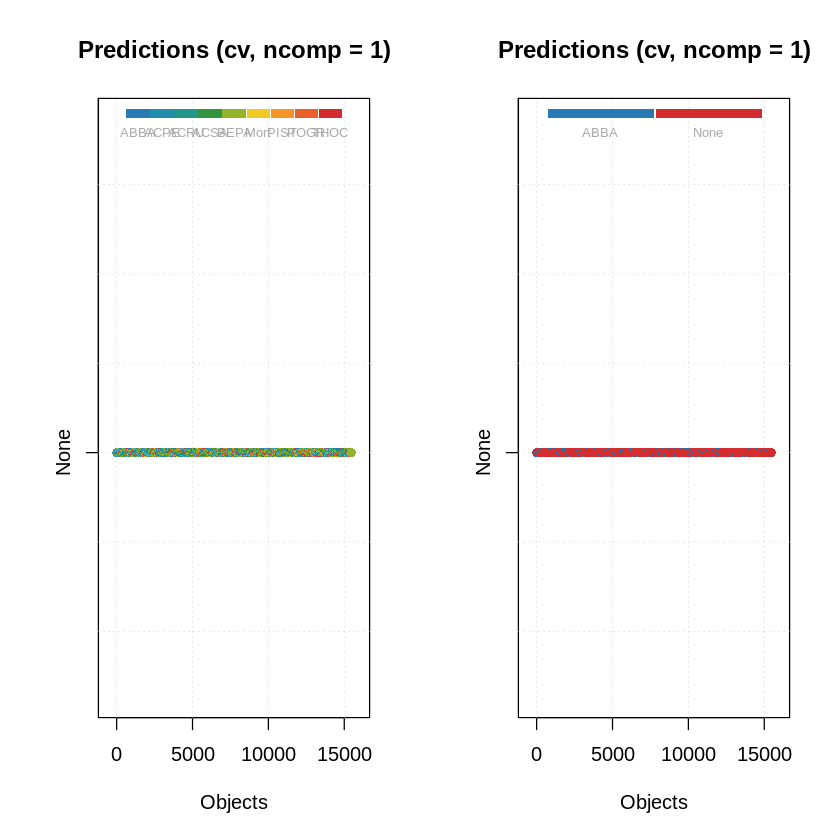

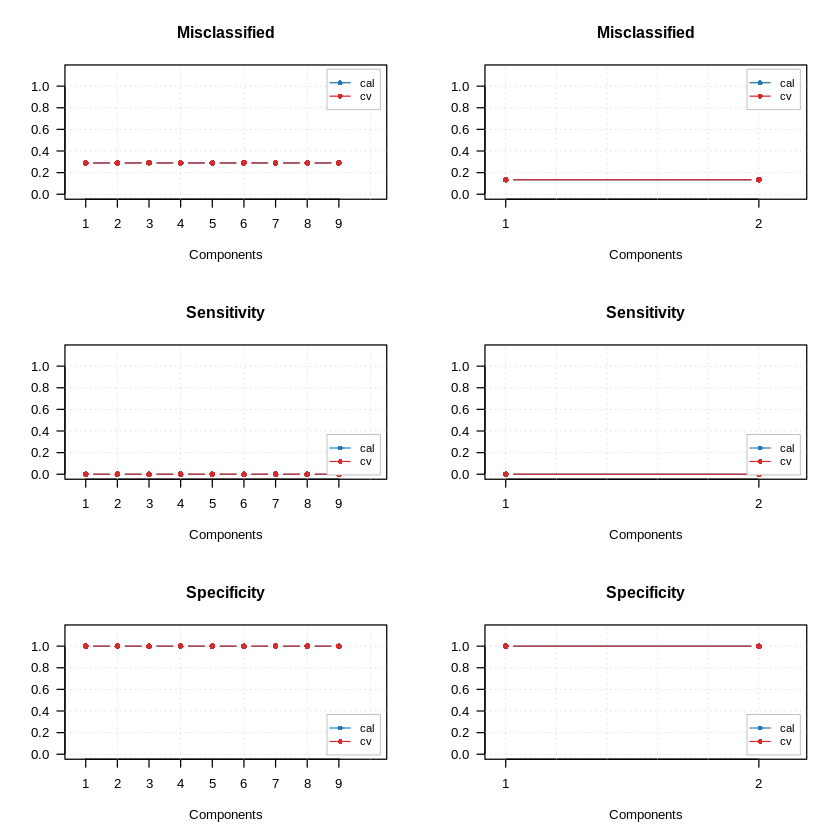


PLS-DA results (class plsdares) summary:
Number of selected components: 1

Class #1 (ABBA):
       X expvar X cumexpvar Y expvar Y cumexpvar TP FP   TN  FN Spec. Sens.
Comp 1   96.182      96.182    0.096       0.096  0  0 3380 485     1     0
Comp 2    2.572      98.753   -0.017       0.079  0  0 3380 485     1     0
Comp 3    0.618      99.372    0.007       0.086  0  0 3380 485     1     0
Comp 4    0.153      99.525    0.003       0.089  0  0 3380 485     1     0
Comp 5    0.223      99.748   -0.013       0.076  0  0 3380 485     1     0
Comp 6    0.062      99.811   -0.005       0.070  0  0 3380 485     1     0
Comp 7    0.064      99.874    0.005       0.075  0  0 3380 485     1     0
Comp 8    0.062      99.936    0.010       0.085  0  0 3380 485     1     0
Comp 9    0.016      99.952   -0.019       0.066  0  0 3380 485     1     0
       Accuracy
Comp 1    0.875
Comp 2    0.875
Comp 3    0.875
Comp 4    0.875
Comp 5    0.875
Comp 6    0.875
Comp 7    0.875
Comp 8    0.875
Com

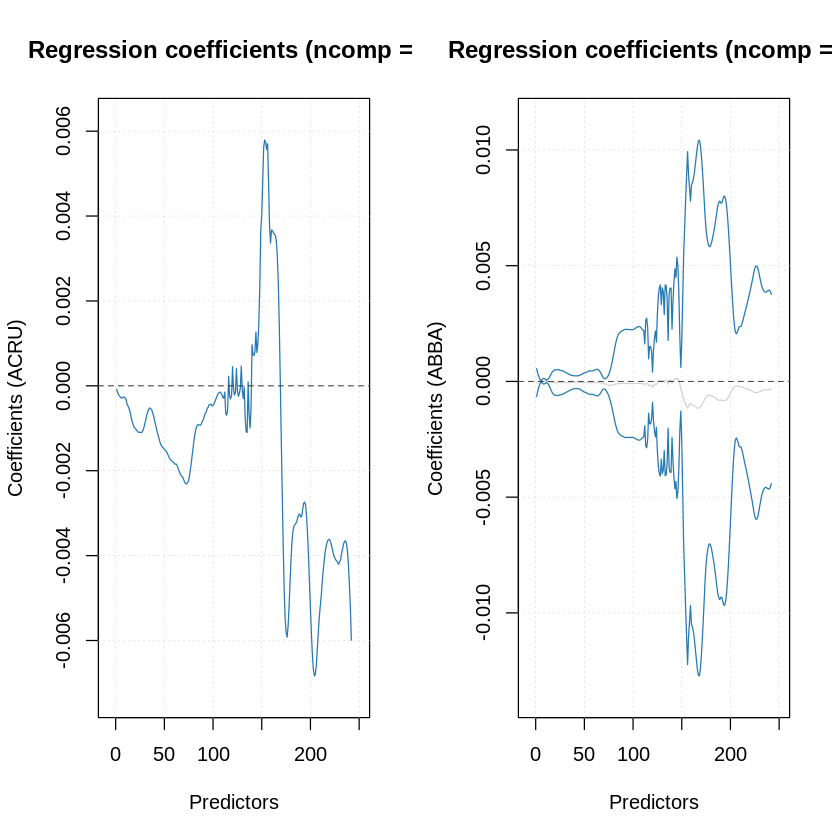

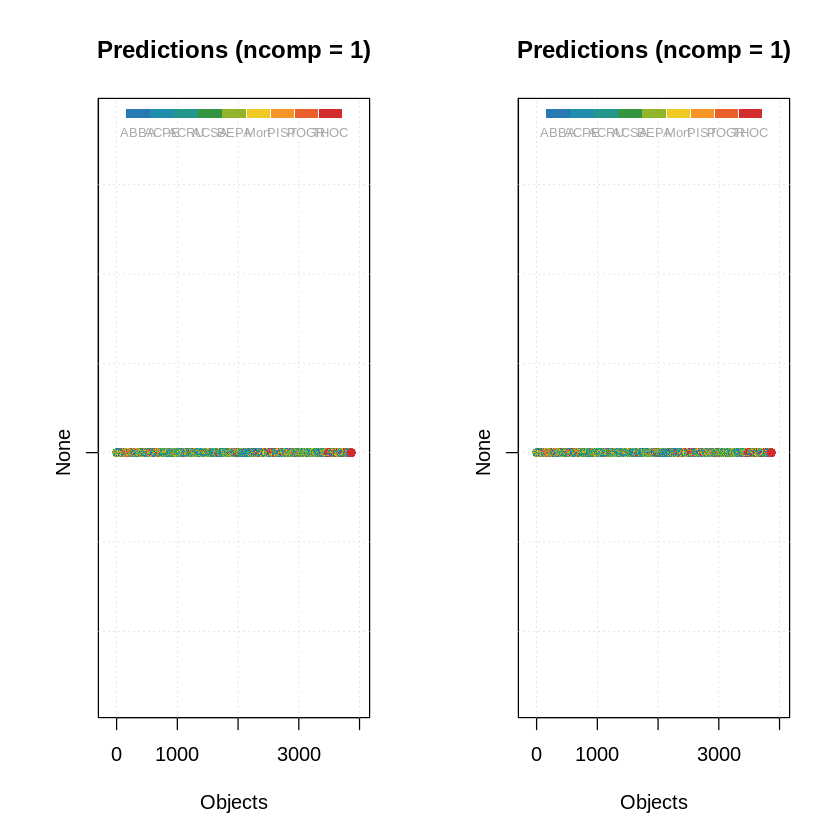

In [9]:
install.packages("mdatools")
install.packages("tidyverse")
install.packages("smotefamily")

library(mdatools)
library(tidyverse)
library(smotefamily)

set.seed(133) #For reproducibility
#import
sbl_sp_ID_bd <- read_rds("sbl_smoothed_spectra.rds")

sbl_sp_ID_bd$Label <- as.factor(sbl_sp_ID_bd$Label)

#Global model

sbl_sp_ID_bd <- sbl_sp_ID_bd[,-247]%>%
  dplyr::group_by(Label) %>%  # Group by 'Label'
  dplyr::filter(n() > 300) %>% # Keep groups with more than 300 occurrences
  dplyr::filter(!Label %in% c("Acer","Picea")) %>%
  dplyr::ungroup() %>%
  dplyr::filter(!is.na(Label))

sbl_sp_ID_bd$Label <- droplevels(sbl_sp_ID_bd$Label)#Drop unused factor levels from filtered out species
sbl_sp_ID_bd$Label <- as.factor(sbl_sp_ID_bd$Label)
levels(sbl_sp_ID_bd$Label)

table(sbl_sp_ID_bd[, 244])

# Apply SMOTE (maybe not for large class numbers)
#smote_sbl_total <- SMOTE(X = sbl_sp_ID_bd[,2:244], target = sbl_sp_ID_bd$Label,
#                      K = 5, dup_size = 3)

# Combine the SMOTE result into a new data frame
smote_sbl <- sbl_sp_ID_bd[,2:244]

#smote_sbl <- data.frame(smote_sbl_total$data)
names(smote_sbl)[ncol(smote_sbl)] <- "Species"
smote_sbl$Species <- as.factor(smote_sbl$Species)

smote_sbl$Species <- droplevels(smote_sbl$Species)#Drop unused factor levels from filtered out species


# Check the distribution of the target variable after SMOTE
table(smote_sbl$Species)

cal.ind <- smote_sbl[sample(1:nrow(smote_sbl),0.80*nrow(smote_sbl), replace=F),]
length(which(cal.ind$Species=="ACRU"))

val.ind <- anti_join(smote_sbl,cal.ind)

table(val.ind$Species)

Xc <-  smote_sbl[rownames(cal.ind), 1:242]
Xv <-  smote_sbl[rownames(val.ind), 1:242]

cc.all <-  cal.ind[rownames(cal.ind), 243]
cc.all <- as.factor (cc.all$Species)
cv.all <-  val.ind[rownames(val.ind), 243]
cv.all <- as.factor(cv.all$Species)
table(cc.all)
table(cv.all)

cc.abba <- cc.all == "ABBA"
cv.abba <- cv.all == "ABBA"


m.all <-  mdatools::plsda(Xc, cc.all, ncomp = 9, cv = 1)
m.abba <- mdatools::plsda(Xc, cc.abba, ncomp=2, cv = 1, classname = "ABBA")

summary(m.all)
summary(m.abba)

getConfusionMatrix(m.all$calres)
getConfusionMatrix(m.abba$calres)

#Classification plots
par(mfrow = c(1, 2))
plotPredictions(m.all) #choose which class to show predictions for with nc= n
plotPredictions(m.abba) #choose which class to show predictions for with nc= n

#Performance plots
par(mfrow = c(3, 2))
plotMisclassified(m.all, nc = 3)
plotMisclassified(m.abba)
plotSensitivity(m.all, nc = 3)
plotSensitivity(m.abba)
plotSpecificity(m.all, nc = 3)
plotSpecificity(m.abba)

par(mfrow = c(1, 2))
plotRegcoeffs(m.all, ncomp = 3, ny = 3)
plotRegcoeffs(m.abba, ncomp = 1, show.ci = TRUE)

#Predictions for new data (validation subset)

res <- predict(m.all,Xv,cv.all)
summary(res)

plotPredictions(res)

resabba <-  predict(m.abba, Xv, cv.all)
summary(resabba)

plotPredictions(resabba)



PLS-DA results (class plsdares) summary:
Number of selected components: 1

Class #1 (ABBA):
       X expvar X cumexpvar Y expvar Y cumexpvar TP FP   TN  FN Spec. Sens.
Comp 1   96.182      96.182    0.096       0.096  0  0 3380 485     1     0
Comp 2    2.572      98.753   -0.017       0.079  0  0 3380 485     1     0
Comp 3    0.618      99.372    0.007       0.086  0  0 3380 485     1     0
Comp 4    0.153      99.525    0.003       0.089  0  0 3380 485     1     0
Comp 5    0.223      99.748   -0.013       0.076  0  0 3380 485     1     0
Comp 6    0.062      99.811   -0.005       0.070  0  0 3380 485     1     0
Comp 7    0.064      99.874    0.005       0.075  0  0 3380 485     1     0
Comp 8    0.062      99.936    0.010       0.085  0  0 3380 485     1     0
Comp 9    0.016      99.952   -0.019       0.066  0  0 3380 485     1     0
       Accuracy
Comp 1    0.875
Comp 2    0.875
Comp 3    0.875
Comp 4    0.875
Comp 5    0.875
Comp 6    0.875
Comp 7    0.875
Comp 8    0.875
Com

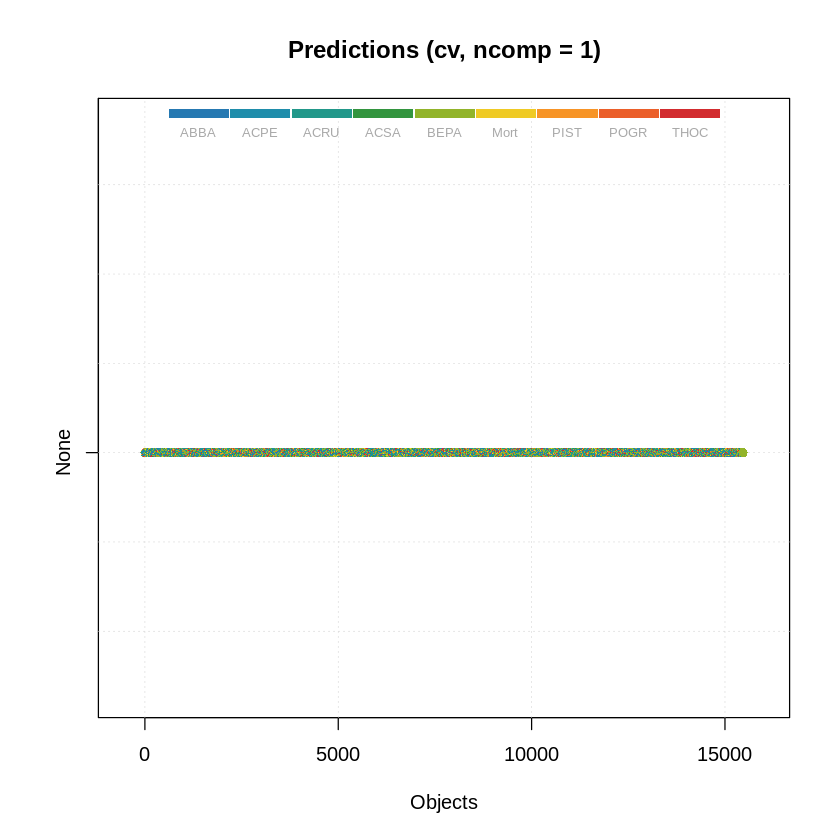

In [11]:
plotPredictions(m.all)
res <- predict(m.all,Xv,cv.all)
summary(res)